<p style="
  text-align: center;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4);
  font-family: 'serif';
  color: #00838f;
  font-size: 2.8rem;
  margin: auto;
">
بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
</p>

<p style="
  background: #ffffff;
  border: 5px solid #00acc1;
  border-radius: 18px;
  padding: 40px 120px;
  text-align: center;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4);
  font-family: 'serif';
  color: #00838f;
  font-size: 2.8rem;
  width: fit-content;
  margin: 20px auto;
">
  Diabetes Prediction <br>
  <span style="
  text-align: center;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4);
  font-family: 'serif';
  color: #00838f;
  font-size: 1.4rem;
  width: fit-content;
">BY: Omar Abdelaal</span>
</p>


## **Diabetes Dataset**
- The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.  

## **Columns**
- **`diabetes`**: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.  

- **`gender`**: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.  

- **`age`**: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.  

- **`hypertension`**: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.  

- **`heart_disease`**: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.  

- **`smoking_history`**: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.  

- **`bmi`**: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.  

- **`HbA1c_level`**: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.  

- **`blood_glucose_level`**: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.  

<p style="
  background: #ffffff;
  border: 5px solid #00acc1;
  border-radius: 18px;
  padding: 40px 120px;
  text-align: center;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4);
  font-family: 'serif';
  color: #00838f;
  font-size: 2.8rem;
  width: fit-content;
  margin: 20px auto;
">
  Importing Libraries
</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ydata_profiling import ProfileReport
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)


<p style="
  background: #ffffff;
  border: 5px solid #00acc1;
  border-radius: 18px;
  padding: 40px 120px;
  text-align: center;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4);
  font-family: 'serif';
  color: #00838f;
  font-size: 2.8rem;
  width: fit-content;
  margin: 20px auto;
">
  Exploratory Data Analysis(EDA)
</p>

## **`|` Understand the Data**

In [3]:
df = pd.read_csv('input/diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 21.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **`|` Data Cleaning**

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df = df[df['gender'] != 'Other']
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
df.duplicated().sum()

3854

In [11]:
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [12]:
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


## **`|` Univariate Analysis**

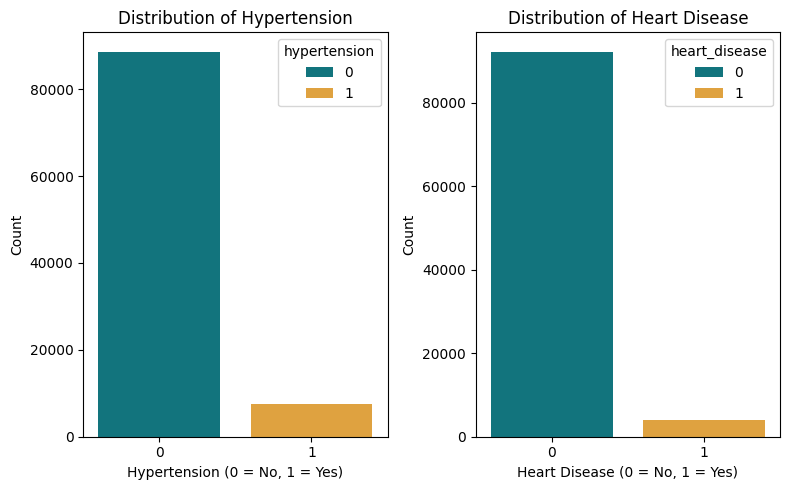

In [13]:
binary_features = ["hypertension", "heart_disease"]

plt.figure(figsize=(8, 5))
for feature in binary_features:
    plt.subplot(1, 2, binary_features.index(feature) + 1)
    sns.countplot(x=feature, data=df, hue=feature, palette=["#00838f", "#f9a825"])
    plt.title(f"Distribution of {feature.replace('_', ' ').title()}")
    plt.xlabel(f"{feature.replace('_', ' ').title()} (0 = No, 1 = Yes)")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

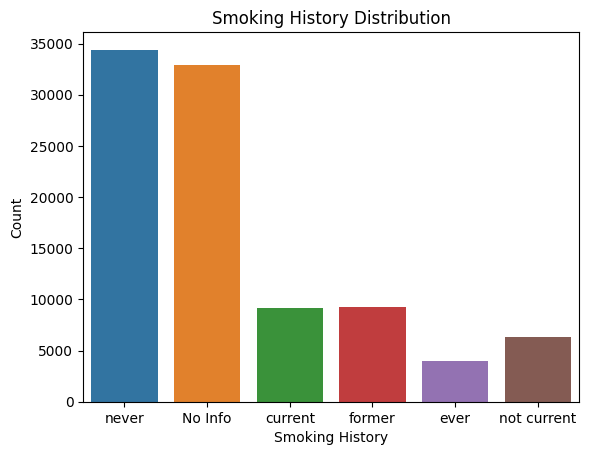

In [14]:
sns.countplot(x='smoking_history', data=df, hue="smoking_history")
plt.title("Smoking History Distribution")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.show()

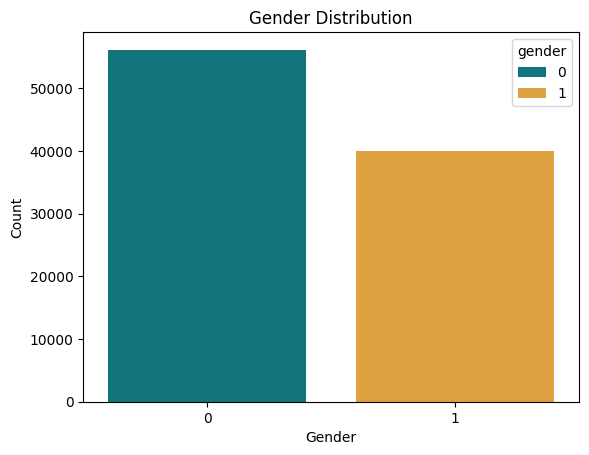

In [15]:
sns.countplot(x='gender', data=df, hue='gender', palette=["#00838f", "#f9a825"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

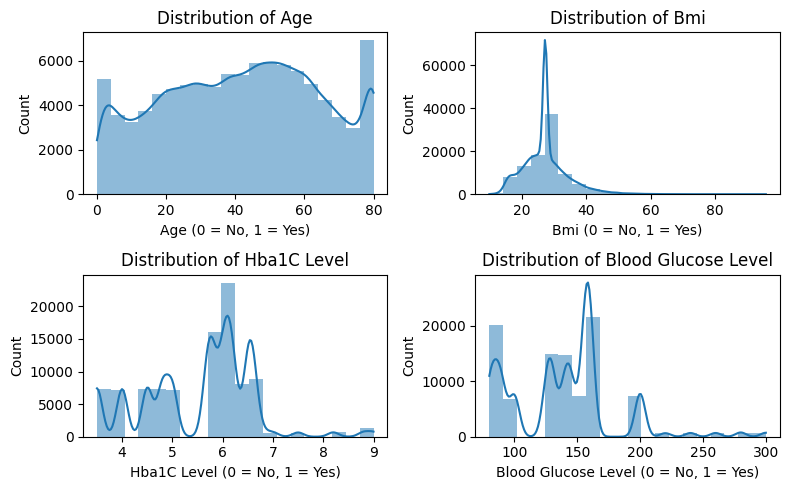

In [16]:
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(8, 5))
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.histplot(x=feature, data=df, bins=20, kde=True, edgecolor=None)
    plt.title(f"Distribution of {feature.replace('_', ' ').title()}")
    plt.xlabel(f"{feature.replace('_', ' ').title()} (0 = No, 1 = Yes)")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

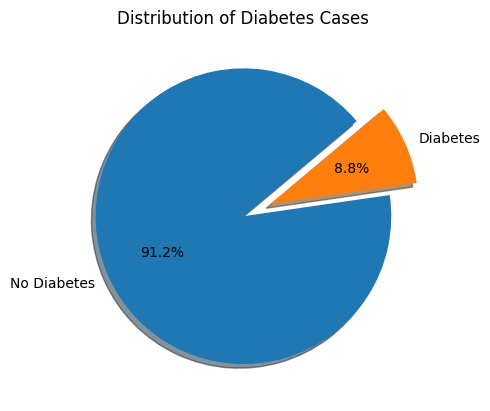

In [17]:
plt.pie(df["diabetes"].value_counts(), labels=["No Diabetes", "Diabetes"], autopct='%1.1f%%', startangle=40, explode=[0, 0.2], shadow=True)
plt.title("Distribution of Diabetes Cases")
plt.show()


## **`|` Bivariate Analysis**

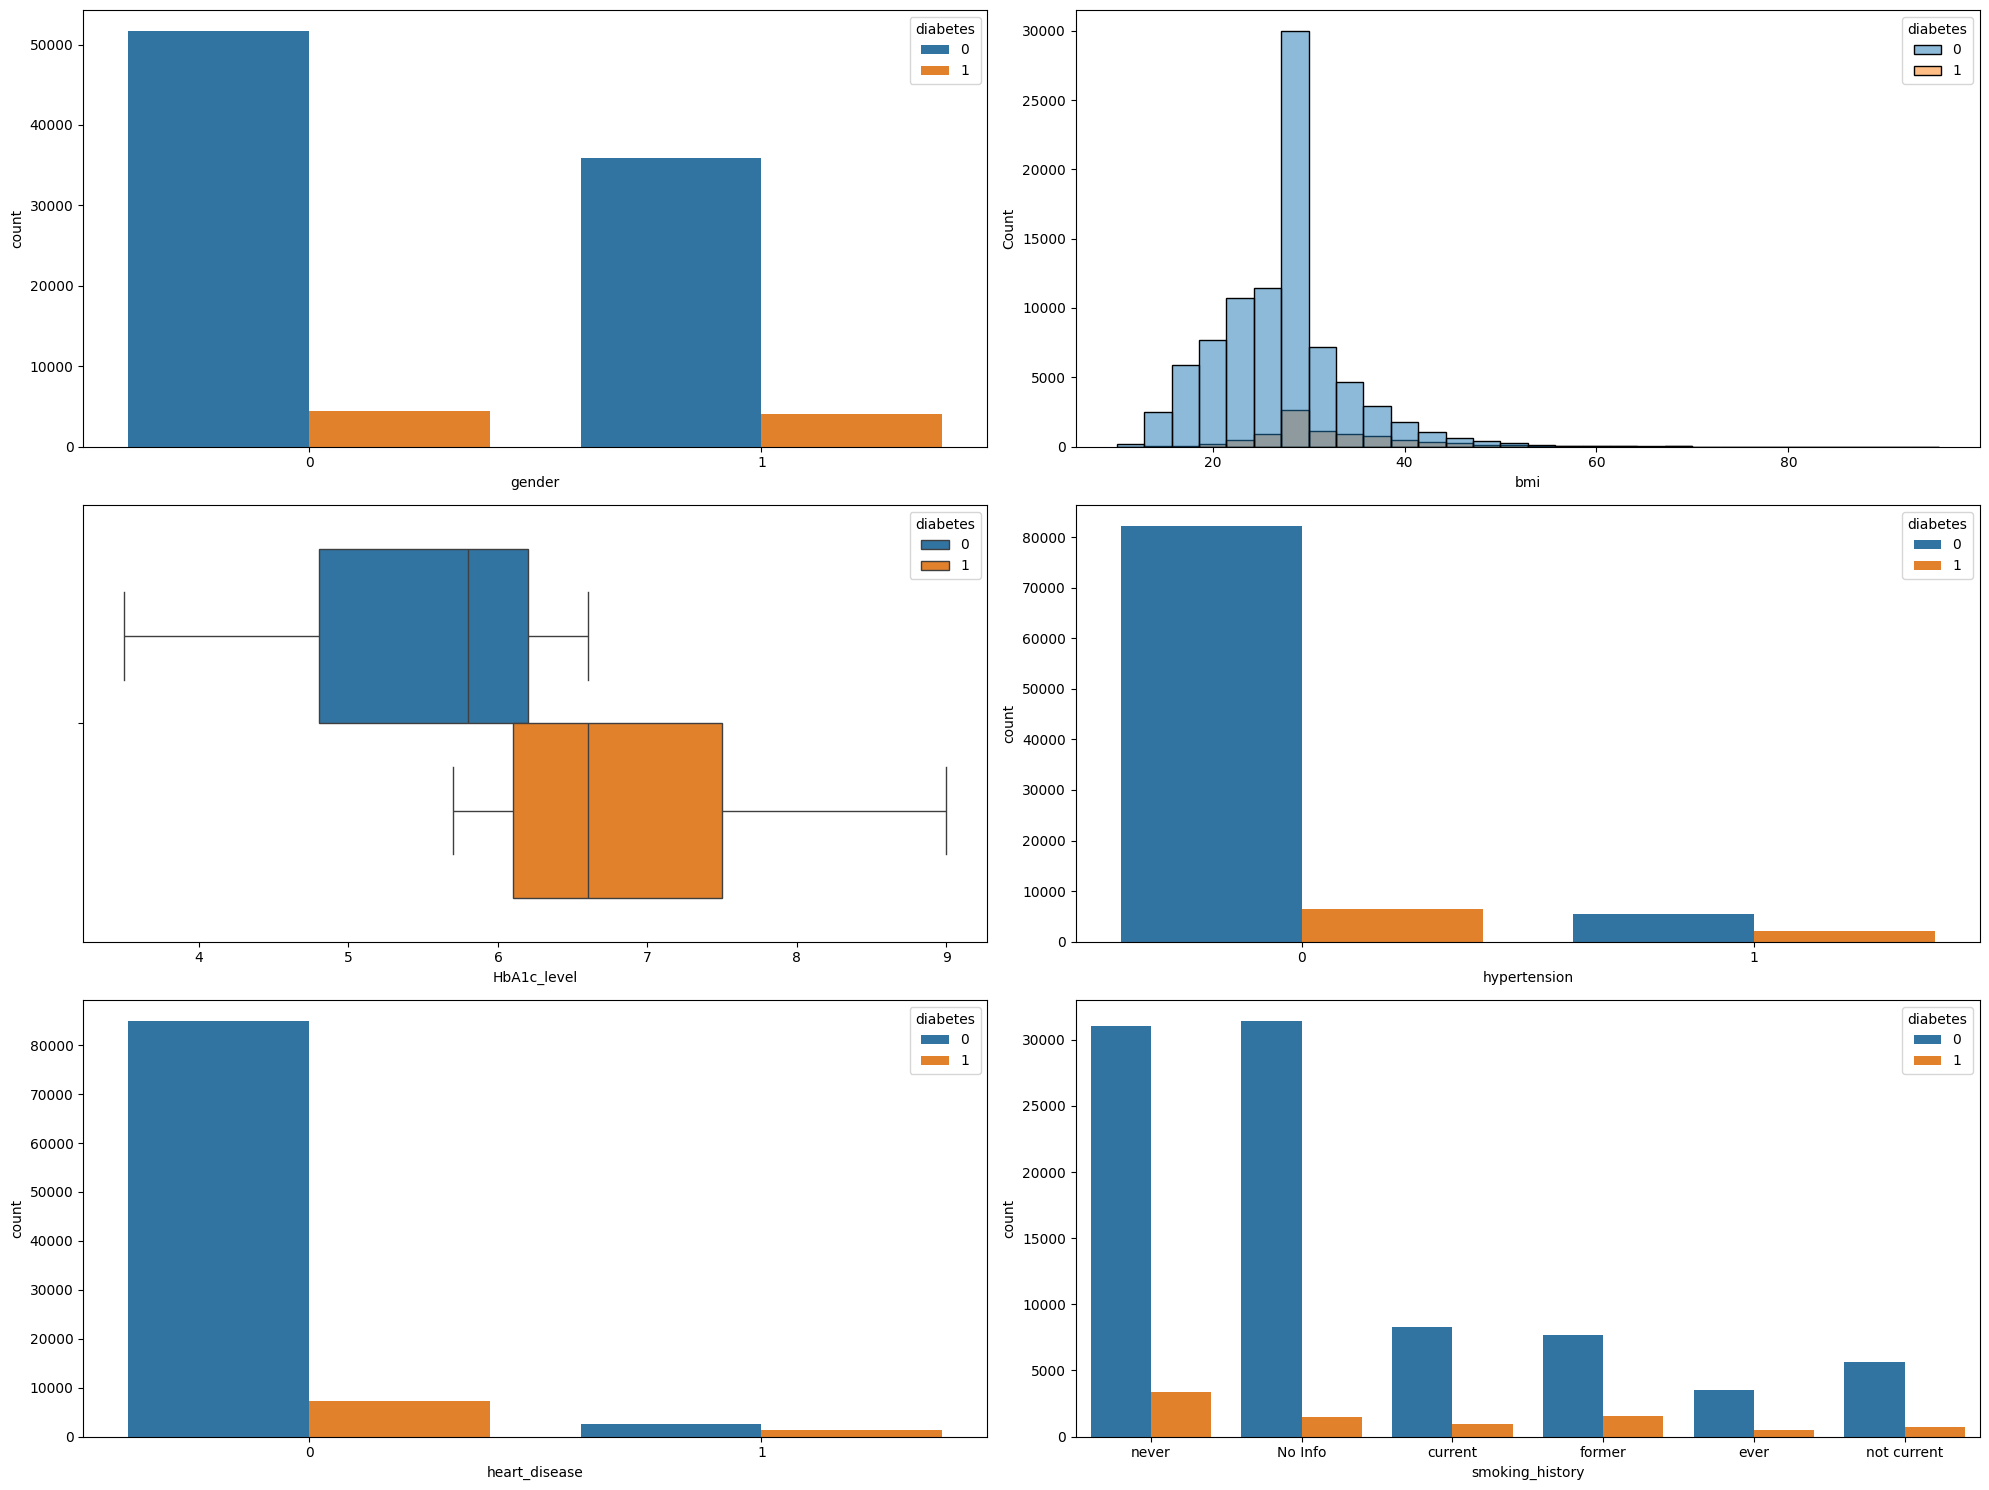

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

sns.countplot(x='gender', data=df, hue='diabetes', ax=axes[0, 0])
sns.histplot(x='bmi', data=df, hue='diabetes', bins=30, ax=axes[0, 1])
sns.boxplot(x='HbA1c_level', data=df, hue='diabetes', ax=axes[1, 0])
sns.countplot(x='hypertension', data=df, hue='diabetes', ax=axes[1, 1])
sns.countplot(x='heart_disease', data=df, hue='diabetes', ax=axes[2, 0])
sns.countplot(x='smoking_history', data=df, hue='diabetes', ax=axes[2, 1])

plt.tight_layout()
plt.show()

## **`|` Multivariate Analysis**

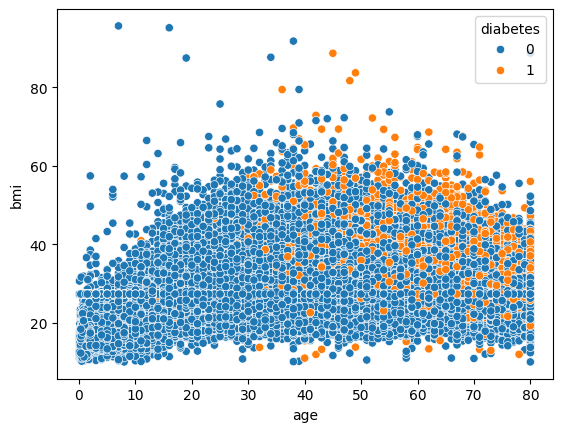

In [19]:
sns.scatterplot(x='age', y='bmi', data=df, hue='diabetes')
plt.show()

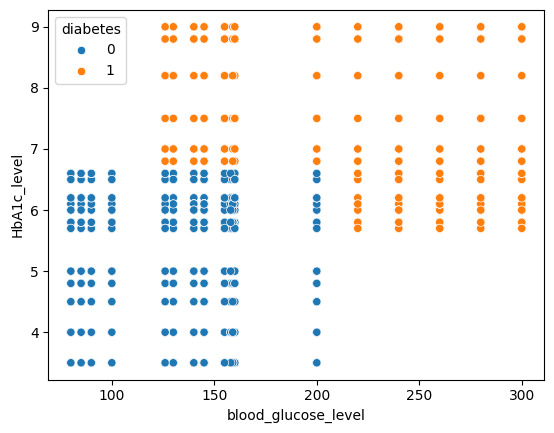

In [20]:
sns.scatterplot(x='blood_glucose_level', y='HbA1c_level', hue='diabetes', data=df)
plt.show()

## **`|` Feature Engineering and Encoding**

In [21]:
smoking_history = {'never': 0, 'No Info': 0, 'current': 2, 'former': 1, 'ever': 1, 'not current': 1}
df['smoking_history'] = df['smoking_history'].map(smoking_history)

In [22]:
data = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

z_scores = np.abs(stats.zscore(data))
threshold = 4
df = df[(z_scores < threshold).all(axis=1)]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [23]:
df["age"] = df["age"].astype(int)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36,0,0,0,24.60,4.8,145,0
99996,0,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,1,27.83,5.7,155,0
99998,0,24,0,0,0,35.42,4.0,100,0


Text(0.5, 1.0, 'correlation of feature')

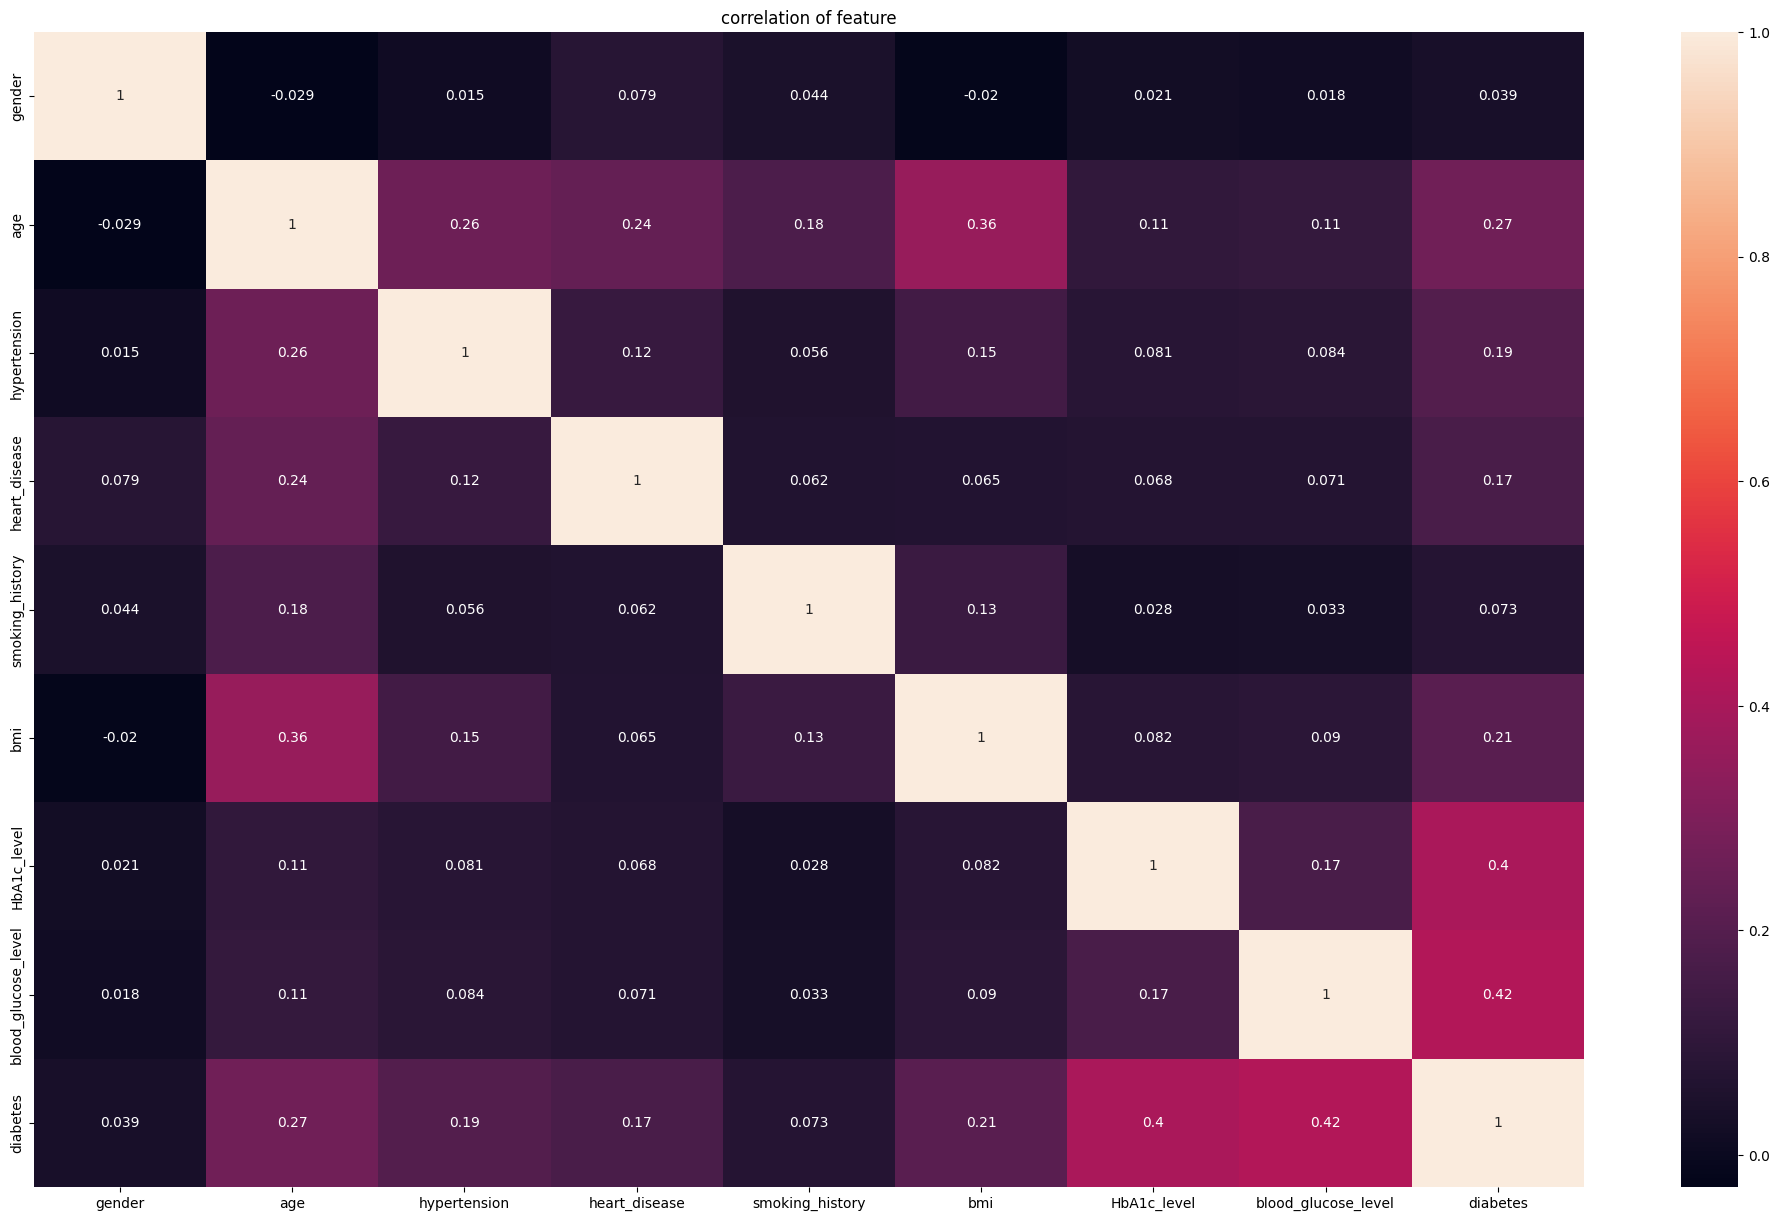

In [24]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation of feature")

## **`|` Summery**

- The dataset contains **100000 rows** and **9 columns** with target columns called diabetes.  

- The dataset is **imbalanced** (**9% Diabetes** | **91% No Diabetes**)  

- **No null rows** were found.  

- **3854 duplicated** rows have been dropped.  

- **18 others rows** in gender have been dropped.  

- **Male and Feamle rows** in gender have been converted to **0 and 1**.  

- Most of the data don't have **hypertension** or **heart disease**.  

- Most correlated features with diabetes are **blood_glucose_level**, **HbA1c_level**, **age** and **bmi**.  

- **Catigorical smoking history** has been converted to numeric data **(0, 1, 2)**

<p style="
  background: #ffffff;
  border: 5px solid #00acc1;
  border-radius: 18px;
  padding: 40px 120px;
  text-align: center;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4);
  font-family: 'serif';
  color: #00838f;
  font-size: 2.8rem;
  width: fit-content;
  margin: 20px auto;
">
  Building Models
</p>

## **`|` Data Preparation**

In [25]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76625, 8), (19157, 8), (76625,), (19157,))

In [27]:
def evaluate_model(model, X_test, y_test, show_report=True):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test) 
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Accuracy:          {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Score:          {f1:.4f}")
    print(f"ROC AUC:           {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion)

    if show_report:
        print("\n" + classification_report(y_test, y_pred, digits=3))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Hypertension', 'Hypertension'],
                yticklabels=['No Hypertension', 'Hypertension'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## **`|` Random Forest**

In [28]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(
        random_state=42,
        n_jobs=-1,
        sampling_strategy= 0.1,
        smote=SMOTE(random_state=42, k_neighbors=4, sampling_strategy=0.1)
    )),
    ('classifier', RandomForestClassifier(
        max_depth=26,
        min_samples_leaf=20,
        class_weight={0: 1, 1: 3},
        random_state=42,
        n_jobs=-1
    ))
])

In [29]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('resample',
                 SMOTETomek(n_jobs=-1, random_state=42, sampling_strategy=0.1,
                            smote=SMOTE(k_neighbors=4, random_state=42,
                                        sampling_strategy=0.1))),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=26,
                                        min_samples_leaf=20, n_jobs=-1,
                                        random_state=42))])

Accuracy:          0.9714
Balanced Accuracy: 0.8508
F1 Score:          0.8114
ROC AUC:           0.9756
Confusion Matrix:
[[17430    54]
 [  494  1179]]

              precision    recall  f1-score   support

           0      0.972     0.997     0.985     17484
           1      0.956     0.705     0.811      1673

    accuracy                          0.971     19157
   macro avg      0.964     0.851     0.898     19157
weighted avg      0.971     0.971     0.969     19157



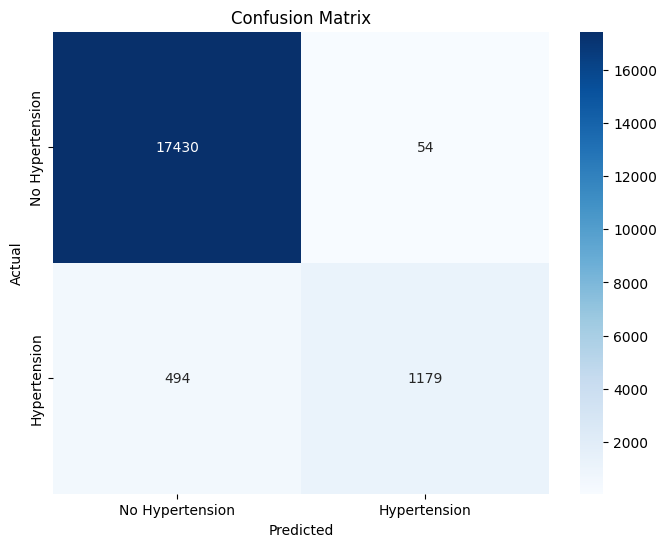

In [30]:
y_pred_rf = evaluate_model(rf_pipeline, X_test, y_test)
y_pred_rf

## **`|` Decision Tree**

In [31]:
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(
        random_state=42,
        n_jobs=-1,
        sampling_strategy= 0.1,
        smote=SMOTE(random_state=42, k_neighbors=4, sampling_strategy=0.1)
    )),
    ('classifier', DecisionTreeClassifier(
        max_depth=8,
        min_samples_leaf=14,
        class_weight={0: 1, 1: 4},
        random_state=42
    ))
])

In [32]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('resample',
                 SMOTETomek(n_jobs=-1, random_state=42, sampling_strategy=0.1,
                            smote=SMOTE(k_neighbors=4, random_state=42,
                                        sampling_strategy=0.1))),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1, 1: 4}, max_depth=8,
                                        min_samples_leaf=14,
                                        random_state=42))])

Accuracy:          0.9706
Balanced Accuracy: 0.8512
F1 Score:          0.8077
ROC AUC:           0.9750
Confusion Matrix:
[[17412    72]
 [  491  1182]]

              precision    recall  f1-score   support

           0      0.973     0.996     0.984     17484
           1      0.943     0.707     0.808      1673

    accuracy                          0.971     19157
   macro avg      0.958     0.851     0.896     19157
weighted avg      0.970     0.971     0.969     19157



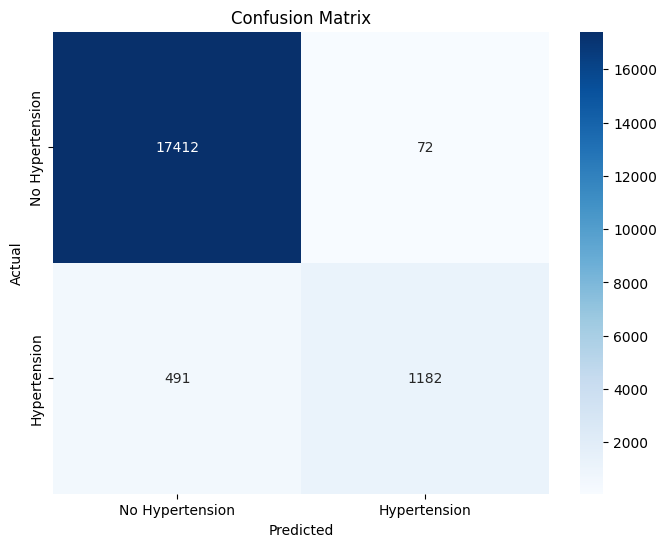

In [33]:
y_pred_dt = evaluate_model(dt_pipeline, X_test, y_test)
y_pred_dt

## **`|` Logistic Regression**

In [34]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(
        random_state=42,
        n_jobs=-1,
        sampling_strategy=0.1,
        smote=SMOTE(random_state=42, k_neighbors=4, sampling_strategy=0.1)
    )),
    ('classifier', LogisticRegression(
        C=0.01,
        solver='liblinear',
        penalty='l1',
        max_iter=100,
        class_weight={0: 1, 1: 2},
        random_state=42
    ))
])

In [35]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('resample',
                 SMOTETomek(n_jobs=-1, random_state=42, sampling_strategy=0.1,
                            smote=SMOTE(k_neighbors=4, random_state=42,
                                        sampling_strategy=0.1))),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 2},
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

Accuracy:          0.9577
Balanced Accuracy: 0.8349
F1 Score:          0.7392
ROC AUC:           0.9636
Confusion Matrix:
[[17199   285]
 [  525  1148]]

              precision    recall  f1-score   support

           0      0.970     0.984     0.977     17484
           1      0.801     0.686     0.739      1673

    accuracy                          0.958     19157
   macro avg      0.886     0.835     0.858     19157
weighted avg      0.956     0.958     0.956     19157



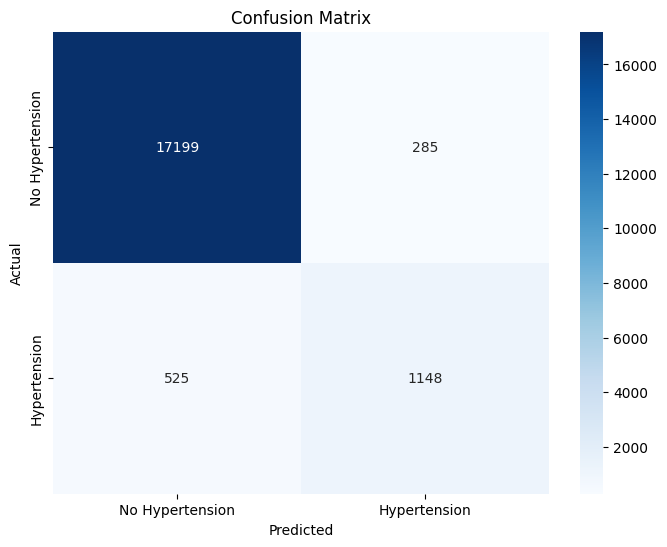

In [36]:
y_pred_lr = evaluate_model(lr_pipeline, X_test, y_test)
y_pred_lr

## **`|` XGBoost**

In [37]:
xg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(
        random_state=42,
        n_jobs=-1,
        sampling_strategy=0.1,
        smote=SMOTE(random_state=42, k_neighbors=4, sampling_strategy=0.1)
    )),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        n_estimators=150,
        learning_rate=0.03,
        max_depth=10,
        min_child_weight=2,
        subsample=0.6,
        n_jobs=-1,
    ))
])

In [38]:
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('resample',
                 SMOTETomek(n_jobs=-1, random_state=42, sampling_strategy=0.1,
                            smote=SMOTE(k_neighbors=4, random_state=42,
                                        sampling_strategy=0.1))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_ro...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=-1,
                               num_parallel_tree=None, ...))])

Accuracy:          0.9719
Balanced Accuracy: 0.8425
F1 Score:          0.8100
ROC AUC:           0.9794
Confusion Matrix:
[[17472    12]
 [  526  1147]]

              precision    recall  f1-score   support

           0      0.971     0.999     0.985     17484
           1      0.990     0.686     0.810      1673

    accuracy                          0.972     19157
   macro avg      0.980     0.842     0.897     19157
weighted avg      0.972     0.972     0.970     19157



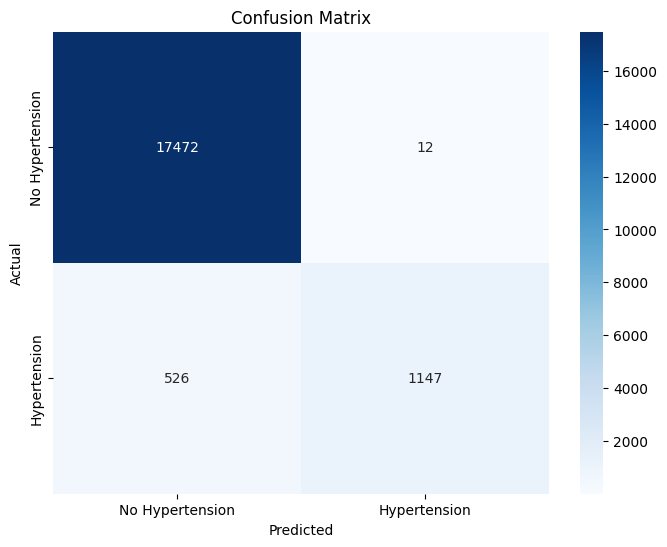

In [39]:
y_pred_xgb = evaluate_model(xg_pipeline, X_test, y_test)
y_pred_xgb

<p style="
  background: #ffffff;
  border: 5px solid #00acc1;
  border-radius: 18px;
  padding: 40px 120px;
  text-align: center;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4);
  font-family: 'serif';
  color: #00838f;
  font-size: 2.8rem;
  width: fit-content;
  margin: 20px auto;
">
  Conclusion
</p>

## **`|` Comparison Table**

In [40]:
def get_cm_values(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn, fp, fn, tp

y_pred_lr = lr_pipeline.predict(X_test)
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_xgb = xg_pipeline.predict(X_test)

results = pd.DataFrame({
    'Model Name': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'True Negative': [
        get_cm_values(y_test, y_pred_lr)[0],
        get_cm_values(y_test, y_pred_dt)[0],
        get_cm_values(y_test, y_pred_rf)[0],
        get_cm_values(y_test, y_pred_xgb)[0]
    ],
    'False Positive': [
        get_cm_values(y_test, y_pred_lr)[1],
        get_cm_values(y_test, y_pred_dt)[1],
        get_cm_values(y_test, y_pred_rf)[1],
        get_cm_values(y_test, y_pred_xgb)[1]
    ],
    'False Negative': [
        get_cm_values(y_test, y_pred_lr)[2],
        get_cm_values(y_test, y_pred_dt)[2],
        get_cm_values(y_test, y_pred_rf)[2],
        get_cm_values(y_test, y_pred_xgb)[2]
    ],
    'True Positive': [
        get_cm_values(y_test, y_pred_lr)[3],
        get_cm_values(y_test, y_pred_dt)[3],
        get_cm_values(y_test, y_pred_rf)[3],
        get_cm_values(y_test, y_pred_xgb)[3]
    ],
    'Accuracy Score': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}).round(4)

# Display neatly
display(results.style.background_gradient(cmap="Blues"))


,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
0,Logistic Regression,17199,285,525,1148,0.957700,0.739200
1,Decision Tree,17412,72,491,1182,0.970600,0.807700
2,Random Forest,17430,54,494,1179,0.971400,0.811400
3,XGBoost,17472,12,526,1147,0.971900,0.810000


## **`|` Save Model**

In [ ]:
import pickle

with open('diabetes.pkl', 'wb') as f:
    pickle.dump(xg_pipeline, f)

***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<br>

***

<br>

<div style="text-align: center;">
   <span style="font-size: 1.6em; font-weight: bold;font-family: Arial;"><a href="https://www.linkedin.com/in/omar-abdelaal-638919296">Omar Abdelaal</a></span>
</div>